One of the mentors, Evan Payne, was curious about whether the fullness of the moon would have an effect on car break-ins, he (more or less) said that when the moon is full, there's just enough light to help one see, but enough darkness to conceal oneself. I thought I'd add burglary, too.

First of all, I opened 'DB Browser For SQLite', imported the CSV files 'Crime_Data_2017_1.csv' and 'Moon_Fraction_Illumination_2017_two_column.csv'. Combine them using the SQL Query below. 

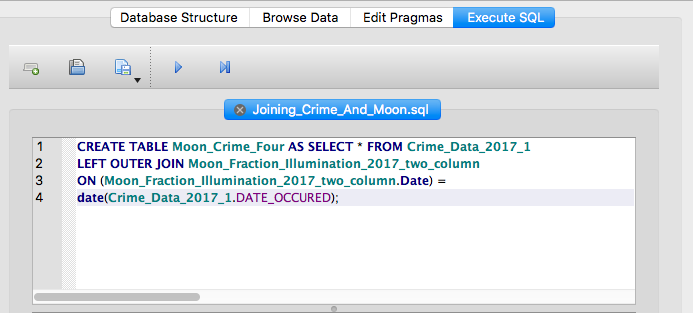

In [2]:
from IPython.display import Image

Image("SQL_Query_Pic_1.png")

I went back into the "Database Structure" part, selected that newly made table and then selected "File > Export > Table(s) as CSV..." When prompted to, I pressed "OK". I didn't need to worry about the set-up details all that much for this session.

In [3]:
# Importing the dependencies that'll be necessary for doing work in Jupyter Notebook

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from bokeh.io import push_notebook, show, output_notebook
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource
output_notebook()

Loading BokehJS ...

Now to get that csv file I made earlier.

In [4]:
crime_fullness_df=pd.read_csv('Moon_Crime_Four.csv')

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
## Previewing the data. Wanna drop the NAN values with "dropna()". 
#Limiting how much of the table that'll be seen to the head of the document

crime_fullness_df.dropna().head()

,INCIDENT_NUMBER,DATE_REPORTED,DATE_OCCURED,UOR_DESC,CRIME_TYPE,NIBRS_CODE,UCR_HIERARCHY,ATT_COMP,LMPD_DIVISION,LMPD_BEAT,PREMISE_TYPE,BLOCK_ADDRESS,CITY,ZIP_CODE,ID,Date,PercentageofIllumination
2,80-16-111438,2017-01-01 11:32:51,2017-01-01 09:16:51,"TBUT OR DISP AUTO > $500 BUT < $10,000",MOTOR VEHICLE THEFT,240,PART I,COMPLETED,2ND DIVISION,211,CONVENIENCE STORE,S 38TH ST / W MARKET ST,LOUISVILLE,40212,1027637,2017-01-01,0.08
3,80-16-111465,2017-01-01 16:20:16,2017-01-01 15:55:16,"TBUT OR DISP AUTO > $500 BUT < $10,000",MOTOR VEHICLE THEFT,240,PART I,COMPLETED,4TH DIVISION,435,LIQUOR STORE,4400 BLOCK MANSLICK RD,LOUISVILLE,40216,1027639,2017-01-01,0.08
4,80-16-111481,2017-01-01 18:38:13,2017-01-01 13:34:13,"TBUT OR DISP AUTO > $500 BUT < $10,000",MOTOR VEHICLE THEFT,240,PART I,COMPLETED,2ND DIVISION,211,HIGHWAY / ROAD / ALLEY,S 43RD ST / W MARKET ST,LOUISVILLE,40212,1027641,2017-01-01,0.08
5,80-17-000012,2017-01-01 00:44:00,2017-01-01 00:44:00,ASSAULT - 1ST DEGREE,ASSAULT,13A,PART I,COMPLETED,2ND DIVISION,223,RESIDENCE / HOME,1600 BLOCK WILSON AVE,LOUISVILLE,40210,1027643,2017-01-01,0.08
6,80-17-000010,2017-01-01 01:30:00,2017-01-01 00:50:00,ASSAULT - 4TH DEGREE (NO VISIBLE INJURY),ASSAULT,13B,PART II,COMPLETED,3RD DIVISION,322,BAR / NIGHT CLUB,200 BLOCK EVANGELINE AVE,LOUISVILLE,40214,1027644,2017-01-01,0.08


I went back into 'DB Browser' and run the SQL query pictured below.

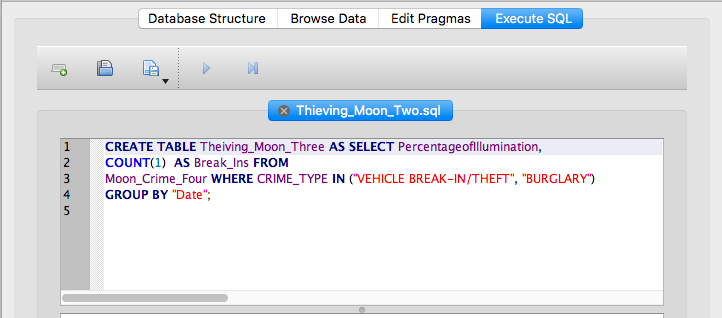

In [6]:
Image("SQL_Query_Pic_6.png")

Once again, go back into the "Database Structure" part, select that newly made table and then select "File > Export > Table(s) as CSV..."


In [7]:
#Now to get some more precise numbers. I want to make those seperate instances of burglary/car break-ins count as one
#instance of a break-in. Then compare them to moon fullness. Gonna use that via that csv I exported

theif_fullness_df=pd.read_csv('Theiving_Moon_Three.csv')

In [9]:
## Previewing the data. Wanna drop the NAN values with "dropna()"

theif_fullness_df.dropna().sort_values(by='Break_Ins', ascending=False)

,PercentageofIllumination,Break_Ins
1,0.08,58
10,0.93,55
16,0.84,55
210,0.36,54
197,0.57,54
2,0.15,54
203,0.02,53
13,0.99,51
173,0.06,50
195,0.77,50


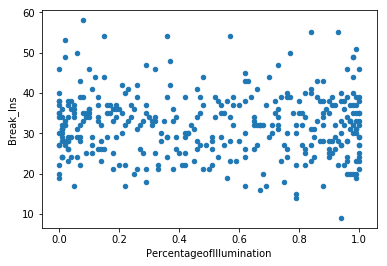

In [20]:
#Using matplotlib to to create a scatter plot

t_f=theif_fullness_df.plot.scatter(x='PercentageofIllumination', y='Break_Ins')
plt.show(t_f)

Huh...that scatter looks a little weird, though I'm doubting the possibility of a significant pattern. Gonna use Bokeh.JS to get a larger illustration. Maybe that'll help.

In [21]:
##Gotta tell Bokeh where to get the info it's gonna chart at

source = ColumnDataSource(theif_fullness_df)

In [23]:
t_f = figure(title='Moon Fullness And Break-Ins', plot_width=650, plot_height=650)
t_f.circle('PercentageofIllumination', 'Break_Ins', fill_color="white", size=7, source=source)
show(t_f)

In [17]:
theif_fullness_df['PercentageofIllumination'].corr(theif_fullness_df['Break_Ins'])

-0.02868174979748295

Guess I gotta say, it looks like there's no correlation between the fullness of the moon and break-ins.